# Instalar las librerías
Instalación de la librería de python de la empresa que mantiene el modelo YOLO junto con sus dependencias

In [1]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.6/755.6 kB 6.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

# Descargar el dataset propio
Obtener de mi almacenamiento de Google Drive el archivo .zip que contiene el dataset que he creado con las tortitas de la oficina y extraerlo para poder utilizarlo con el modelo de segmentación de YOLO.

In [2]:
from google.colab import drive

# Crear un directorio que contenga todo mi almacenamiento de Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import zipfile

# Ruta del dataset comprimido como un zip
dataset_zip_path = '/content/drive/MyDrive/Colab Notebooks/TFG/Entrenamiento en rSoccer/Entorno real/Imágenes_Etiquetadas.zip'

# Ruta en la que se quiere guardar el dataset descomprimido
dataset_desired_path = '/content'

# Extracción del dataset
z = zipfile.ZipFile(dataset_zip_path, "r")
try:
    z.extractall(path=dataset_desired_path)
except:
    print('ERROR: No se ha podido descomprimir el dataset')
    pass
z.close()

# Entrenamiento del modelo
En esta sección se va a entrenar un modelo YOLOv8 preentrenado con el dataset que se ha creado específicamente para la tarea asignada. Dicho dataset cuenta con 38 imágenes de un objeto prismático que debe ser detectado y segmentado.

In [4]:
from ultralytics import YOLO

# Cargar un modelo de YOLO orientado a la tarea de segmentación con los pesos
# preentrenados
model = YOLO('yolov8n.pt')

resutls = model.train(data='/content/Imágenes_Etiquetadas/dataset.yaml', imgsz=640, epochs=250, patience=100, batch=-1)

100%|██████████| 6.23M/6.23M [00:00<00:00, 91.5MB/s]


Ultralytics YOLOv8.2.10 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Imágenes_Etiquetadas/dataset.yaml, epochs=250, time=None, patience=100, batch=-1, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show

100%|██████████| 755k/755k [00:00<00:00, 21.1MB/s]


Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/Imágenes_Etiquetadas/labels/train... 23 images, 0 backgrounds, 0 corrupt: 100%|██████████| 23/23 [00:00<00:00, 802.19it/s]

train: New cache created: /content/Imágenes_Etiquetadas/labels/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/Imágenes_Etiquetadas/labels/val... 6 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6/6 [00:00<00:00, 583.61it/s]

val: New cache created: /content/Imágenes_Etiquetadas/labels/val.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005625000000000001), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 250 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/250      3.17G      1.279      4.358     0.9881        228        640: 100%|██████████| 1/1 [00:01<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.45s/it]

                   all          6         36          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/250      3.07G      1.159      4.283      0.969        200        640: 100%|██████████| 1/1 [00:00<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.09it/s]

                   all          6         36          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/250      3.17G      1.138      4.378     0.9223        216        640: 100%|██████████| 1/1 [00:00<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.99it/s]

                   all          6         36          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/250      3.09G       1.22      4.386     0.9713        226        640: 100%|██████████| 1/1 [00:00<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.32it/s]


                   all          6         36          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/250      3.09G      1.165      4.363     0.9689        207        640: 100%|██████████| 1/1 [00:00<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.63it/s]

                   all          6         36          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/250      3.23G      1.158      4.265      1.011        152        640: 100%|██████████| 1/1 [00:00<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.72it/s]

                   all          6         36          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/250      3.11G      1.165      4.304     0.9054        269        640: 100%|██████████| 1/1 [00:00<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.88it/s]

                   all          6         36          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/250      3.11G      1.063      4.177     0.8819        226        640: 100%|██████████| 1/1 [00:00<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.89it/s]

                   all          6         36   0.000833     0.0667    0.00162   0.000886



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/250      3.11G      1.034      4.056      0.868        237        640: 100%|██████████| 1/1 [00:00<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.91it/s]

                   all          6         36    0.00192      0.167     0.0171      0.011



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/250      3.11G      1.025      3.939      0.872        225        640: 100%|██████████| 1/1 [00:00<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.92it/s]

                   all          6         36     0.0021        0.2     0.0558     0.0395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/250      3.11G     0.9703      3.712     0.8693        181        640: 100%|██████████| 1/1 [00:00<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.95it/s]

                   all          6         36    0.00198        0.2      0.133      0.106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/250      3.08G      0.969      3.477     0.8701        186        640: 100%|██████████| 1/1 [00:00<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.47it/s]

                   all          6         36    0.00267      0.233      0.169      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/250      3.09G      1.018      3.476     0.8441        281        640: 100%|██████████| 1/1 [00:00<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.05it/s]

                   all          6         36    0.00192        0.2      0.167      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/250      3.11G      1.017       3.23     0.8365        210        640: 100%|██████████| 1/1 [00:00<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.63it/s]

                   all          6         36    0.00547        0.3      0.189      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/250      3.09G      1.061      3.199     0.8556        271        640: 100%|██████████| 1/1 [00:00<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.77it/s]

                   all          6         36    0.00777        0.4      0.218      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/250      3.11G       1.07      2.883     0.8521        249        640: 100%|██████████| 1/1 [00:00<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.13it/s]

                   all          6         36    0.00841      0.433      0.224      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/250      3.12G     0.9951      2.581     0.8542        213        640: 100%|██████████| 1/1 [00:00<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.11it/s]

                   all          6         36     0.0106        0.5      0.226      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/250      3.12G     0.9936      2.556     0.8526        210        640: 100%|██████████| 1/1 [00:00<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.75it/s]

                   all          6         36      0.015      0.633      0.236      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/250      3.11G     0.9934      2.293     0.8245        218        640: 100%|██████████| 1/1 [00:00<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.93it/s]

                   all          6         36     0.0178        0.7      0.292      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/250      3.12G      1.054      2.142     0.8541        230        640: 100%|██████████| 1/1 [00:00<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.14it/s]

                   all          6         36      0.018        0.7       0.31      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/250      3.11G     0.9892      2.081     0.8468        208        640: 100%|██████████| 1/1 [00:00<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.18it/s]

                   all          6         36     0.0196      0.767      0.318      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/250      3.11G     0.9712      1.922      0.851        201        640: 100%|██████████| 1/1 [00:00<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.97it/s]

                   all          6         36     0.0196      0.783      0.294      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/250      3.11G      0.992      1.889     0.8834        177        640: 100%|██████████| 1/1 [00:00<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.44it/s]

                   all          6         36     0.0205       0.85      0.289      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/250      3.09G     0.8944      1.697     0.8214        194        640: 100%|██████████| 1/1 [00:00<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.00it/s]

                   all          6         36     0.0211       0.85      0.272      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/250      3.11G     0.9639      1.639     0.8572        232        640: 100%|██████████| 1/1 [00:00<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.81it/s]

                   all          6         36     0.0217      0.883      0.281      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/250      3.12G      0.967      1.641     0.8347        264        640: 100%|██████████| 1/1 [00:00<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.25it/s]

                   all          6         36     0.0223        0.9      0.293      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/250      3.12G     0.9451      1.547     0.8488        275        640: 100%|██████████| 1/1 [00:00<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.33it/s]


                   all          6         36     0.0224        0.9      0.304      0.206

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/250      3.12G     0.9939      1.506     0.8682        202        640: 100%|██████████| 1/1 [00:00<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.04it/s]

                   all          6         36     0.0224        0.9      0.345      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/250      3.09G     0.9014      1.474      0.851        226        640: 100%|██████████| 1/1 [00:00<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.21it/s]

                   all          6         36     0.0225        0.9      0.368      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/250      3.11G     0.9854      1.436     0.8561        231        640: 100%|██████████| 1/1 [00:00<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.46it/s]

                   all          6         36     0.0226        0.9      0.372      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/250       3.1G     0.9254      1.246     0.8567        211        640: 100%|██████████| 1/1 [00:00<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.11it/s]

                   all          6         36     0.0224      0.867       0.38       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/250      3.09G     0.9114      1.185     0.8577        187        640: 100%|██████████| 1/1 [00:00<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.44it/s]

                   all          6         36     0.0225      0.883      0.376      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/250      3.11G     0.8961      1.194     0.8511        228        640: 100%|██████████| 1/1 [00:00<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.15it/s]

                   all          6         36     0.0212      0.817      0.373      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/250      3.12G     0.9063      1.175     0.8501        236        640: 100%|██████████| 1/1 [00:00<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.76it/s]

                   all          6         36     0.0216      0.817      0.354      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/250      3.09G     0.9025      1.234      0.847        222        640: 100%|██████████| 1/1 [00:00<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.50it/s]

                   all          6         36     0.0209      0.817      0.376      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/250      3.09G     0.8639      1.033     0.8497        205        640: 100%|██████████| 1/1 [00:00<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.05it/s]

                   all          6         36     0.0208      0.817      0.453      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/250      3.12G     0.8412     0.9977     0.8424        227        640: 100%|██████████| 1/1 [00:00<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.40it/s]


                   all          6         36     0.0213      0.817      0.467      0.341

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/250      3.18G     0.7748      0.887     0.8566        185        640: 100%|██████████| 1/1 [00:00<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.35it/s]


                   all          6         36      0.022       0.85      0.458      0.353

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/250      3.11G     0.8114     0.9911     0.8474        191        640: 100%|██████████| 1/1 [00:00<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.49it/s]

                   all          6         36     0.0221      0.817      0.372      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/250       3.1G     0.8162     0.9121      0.834        221        640: 100%|██████████| 1/1 [00:00<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.23it/s]

                   all          6         36     0.0182      0.667      0.297      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/250      3.09G     0.9008     0.9371     0.8713        229        640: 100%|██████████| 1/1 [00:00<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.60it/s]

                   all          6         36     0.0172       0.55      0.268      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/250      3.11G     0.8048     0.8662     0.8558        197        640: 100%|██████████| 1/1 [00:00<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.48it/s]

                   all          6         36     0.0181      0.533      0.257      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/250      3.11G     0.8524     0.9197      0.863        197        640: 100%|██████████| 1/1 [00:00<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.78it/s]

                   all          6         36     0.0167      0.483      0.239      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/250      3.08G     0.7991     0.9086     0.8673        211        640: 100%|██████████| 1/1 [00:00<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.18it/s]

                   all          6         36     0.0162       0.55      0.241      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/250      3.09G     0.8317     0.8253     0.8577        191        640: 100%|██████████| 1/1 [00:00<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.16it/s]

                   all          6         36     0.0184      0.633      0.347       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/250      3.09G     0.8184     0.8297     0.8595        216        640: 100%|██████████| 1/1 [00:00<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.21it/s]

                   all          6         36     0.0192      0.717      0.534        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/250       3.1G     0.8036     0.7673     0.8543        237        640: 100%|██████████| 1/1 [00:00<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.90it/s]

                   all          6         36     0.0178      0.733      0.593      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/250      3.09G     0.8462     0.8042     0.8649        214        640: 100%|██████████| 1/1 [00:00<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.67it/s]

                   all          6         36     0.0187      0.767      0.674      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/250      3.09G     0.8056     0.7751     0.8432        214        640: 100%|██████████| 1/1 [00:00<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.78it/s]

                   all          6         36     0.0197      0.767      0.681      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/250      3.11G     0.7604     0.7881     0.8517        153        640: 100%|██████████| 1/1 [00:00<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.01it/s]

                   all          6         36     0.0157      0.733      0.663      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/250      3.11G     0.8361     0.7959     0.8543        202        640: 100%|██████████| 1/1 [00:00<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.66it/s]

                   all          6         36      0.012      0.683      0.652       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/250      3.09G     0.8387      0.867     0.8423        162        640: 100%|██████████| 1/1 [00:00<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.55it/s]

                   all          6         36     0.0125        0.7      0.639      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/250      3.12G     0.8537     0.8174     0.8569        243        640: 100%|██████████| 1/1 [00:00<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.61it/s]

                   all          6         36     0.0127      0.683      0.569      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/250       3.1G     0.8493     0.7581     0.8474        214        640: 100%|██████████| 1/1 [00:00<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.98it/s]

                   all          6         36     0.0132        0.7      0.587      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/250      3.09G      0.809     0.7203     0.8426        243        640: 100%|██████████| 1/1 [00:00<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.02it/s]

                   all          6         36     0.0135      0.733        0.7      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/250      3.12G     0.7736     0.7226     0.8226        241        640: 100%|██████████| 1/1 [00:00<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.97it/s]

                   all          6         36      0.014      0.767      0.701      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/250      3.11G      0.806     0.7168     0.8413        239        640: 100%|██████████| 1/1 [00:00<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.66it/s]

                   all          6         36     0.0142      0.767      0.729      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/250      3.08G     0.7614      0.718     0.8298        205        640: 100%|██████████| 1/1 [00:00<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.34it/s]

                   all          6         36     0.0149        0.8      0.762      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/250      3.09G     0.7868     0.7248     0.8355        236        640: 100%|██████████| 1/1 [00:00<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.16it/s]

                   all          6         36     0.0149        0.8      0.753      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/250      3.08G     0.7716     0.7455     0.8558        186        640: 100%|██████████| 1/1 [00:00<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.31it/s]


                   all          6         36     0.0144      0.783      0.753      0.583

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/250      3.09G     0.7598     0.7312     0.8574        195        640: 100%|██████████| 1/1 [00:00<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.58it/s]

                   all          6         36     0.0148        0.8      0.725      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/250      3.11G     0.7851     0.7334     0.8694        188        640: 100%|██████████| 1/1 [00:00<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.67it/s]

                   all          6         36     0.0219        0.9       0.75      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/250      3.12G     0.7929     0.7185     0.8458        231        640: 100%|██████████| 1/1 [00:00<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.27it/s]

                   all          6         36     0.0261      0.967      0.844      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/250      3.11G     0.8088     0.8001     0.8342        240        640: 100%|██████████| 1/1 [00:00<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.18it/s]

                   all          6         36     0.0248      0.967      0.889       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/250       3.1G     0.8289     0.7268     0.8635        220        640: 100%|██████████| 1/1 [00:00<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.35it/s]

                   all          6         36     0.0247      0.967      0.898      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/250      3.09G     0.8078     0.6839     0.8496        191        640: 100%|██████████| 1/1 [00:00<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.70it/s]

                   all          6         36     0.0238      0.967       0.84      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/250       3.1G     0.7567     0.6586     0.8354        234        640: 100%|██████████| 1/1 [00:00<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.37it/s]

                   all          6         36      0.973      0.445       0.72       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/250      3.11G     0.7941     0.6796     0.8337        238        640: 100%|██████████| 1/1 [00:00<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.11it/s]

                   all          6         36      0.986        0.2        0.6      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/250      3.21G     0.7317     0.6936     0.8127        166        640: 100%|██████████| 1/1 [00:00<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.63it/s]

                   all          6         36      0.985        0.2      0.635      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/250      3.09G     0.7584     0.6855     0.8615        177        640: 100%|██████████| 1/1 [00:00<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.36it/s]

                   all          6         36      0.974      0.449      0.773       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/250      3.11G     0.7745     0.7465     0.8341        222        640: 100%|██████████| 1/1 [00:00<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.10it/s]


                   all          6         36     0.0258          1      0.918      0.682

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/250       3.1G     0.7413      0.666     0.8182        251        640: 100%|██████████| 1/1 [00:00<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.04it/s]

                   all          6         36     0.0272          1      0.984      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/250      3.12G     0.7945     0.7073     0.8467        228        640: 100%|██████████| 1/1 [00:00<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.45it/s]

                   all          6         36     0.0274          1      0.987      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/250       3.1G      0.752     0.6481     0.8329        234        640: 100%|██████████| 1/1 [00:00<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.14it/s]

                   all          6         36     0.0278          1      0.995      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/250      3.11G     0.7302     0.6901     0.8242        191        640: 100%|██████████| 1/1 [00:00<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.85it/s]

                   all          6         36     0.0271          1      0.995      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/250      3.09G       0.71     0.6541     0.8395        195        640: 100%|██████████| 1/1 [00:00<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.36it/s]

                   all          6         36     0.0275          1      0.995      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/250      3.09G     0.6947     0.6322     0.8348        184        640: 100%|██████████| 1/1 [00:00<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.54it/s]


                   all          6         36      0.795          1      0.995      0.785

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/250      3.11G     0.7111     0.7162     0.8667        196        640: 100%|██████████| 1/1 [00:00<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.34it/s]

                   all          6         36      0.951       0.97      0.995      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/250      3.09G     0.7252     0.6519     0.8458        199        640: 100%|██████████| 1/1 [00:00<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.14it/s]

                   all          6         36      0.929          1      0.995      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/250      3.09G     0.6832     0.6301     0.8381        178        640: 100%|██████████| 1/1 [00:00<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.53it/s]

                   all          6         36      0.965      0.589      0.995        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/250       3.1G      0.708     0.6089     0.8298        212        640: 100%|██████████| 1/1 [00:00<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.28it/s]

                   all          6         36      0.991      0.419      0.995      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/250      3.11G     0.6872     0.6195     0.8249        206        640: 100%|██████████| 1/1 [00:00<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.18it/s]


                   all          6         36      0.989      0.473      0.995      0.788

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/250      3.11G     0.7416     0.6977     0.8235        253        640: 100%|██████████| 1/1 [00:00<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.23it/s]


                   all          6         36      0.994      0.575      0.995      0.777

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/250      3.12G     0.6781     0.6084     0.8282        211        640: 100%|██████████| 1/1 [00:00<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.79it/s]

                   all          6         36      0.997      0.592      0.995      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/250      3.19G     0.6369     0.6266     0.8304        157        640: 100%|██████████| 1/1 [00:00<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.91it/s]

                   all          6         36          1      0.327      0.995      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/250      3.11G        0.7     0.6227     0.8262        208        640: 100%|██████████| 1/1 [00:00<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.54it/s]

                   all          6         36          1      0.233      0.995      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/250       3.1G     0.6959     0.6475     0.8347        198        640: 100%|██████████| 1/1 [00:00<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.36it/s]

                   all          6         36      0.986      0.556      0.995      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/250      3.19G     0.6755     0.7281     0.8431        183        640: 100%|██████████| 1/1 [00:00<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.38it/s]


                   all          6         36      0.961      0.628      0.995      0.805

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/250      3.09G     0.6801     0.6451     0.8446        155        640: 100%|██████████| 1/1 [00:00<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.83it/s]

                   all          6         36      0.984       0.45      0.995      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/250      3.11G     0.7033     0.6244     0.8318        203        640: 100%|██████████| 1/1 [00:00<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.32it/s]

                   all          6         36      0.985       0.52      0.995      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/250      3.08G     0.7053     0.6309     0.8328        215        640: 100%|██████████| 1/1 [00:00<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.47it/s]

                   all          6         36      0.988      0.535      0.995      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/250      3.09G     0.7228      0.651     0.8209        239        640: 100%|██████████| 1/1 [00:00<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.13it/s]

                   all          6         36      0.987      0.343      0.995      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/250      3.09G     0.7174      0.627     0.8169        226        640: 100%|██████████| 1/1 [00:00<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.95it/s]

                   all          6         36      0.984        0.2      0.995      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/250      3.11G     0.6982     0.6068     0.8446        238        640: 100%|██████████| 1/1 [00:00<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.55it/s]


                   all          6         36      0.984      0.337      0.995      0.771

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/250      3.11G     0.6865     0.6037     0.8267        187        640: 100%|██████████| 1/1 [00:00<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.48it/s]

                   all          6         36      0.989      0.396      0.995      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/250      3.09G     0.6885     0.6253     0.8414        218        640: 100%|██████████| 1/1 [00:00<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.70it/s]

                   all          6         36       0.98      0.556      0.995      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/250       3.1G     0.7079     0.6152      0.825        284        640: 100%|██████████| 1/1 [00:00<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.20it/s]

                   all          6         36       0.98      0.587      0.995      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/250      3.11G     0.7028     0.6431     0.8271        190        640: 100%|██████████| 1/1 [00:00<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.70it/s]

                   all          6         36      0.976      0.577      0.995       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/250      3.09G     0.6865      0.612     0.8374        200        640: 100%|██████████| 1/1 [00:00<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.18it/s]

                   all          6         36      0.971      0.557      0.995      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/250      3.11G     0.7334     0.6204     0.8379        208        640: 100%|██████████| 1/1 [00:00<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.28it/s]

                   all          6         36      0.963      0.551      0.995      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/250      3.11G     0.7283      0.601      0.827        235        640: 100%|██████████| 1/1 [00:00<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.94it/s]

                   all          6         36      0.958      0.497      0.995      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/250      3.11G     0.6825     0.6116     0.8234        207        640: 100%|██████████| 1/1 [00:00<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.65it/s]

                   all          6         36      0.956      0.646      0.995      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/250      3.08G     0.6816     0.6009     0.8236        199        640: 100%|██████████| 1/1 [00:00<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.35it/s]

                   all          6         36      0.956      0.921      0.995      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/250      3.09G     0.6857     0.6247     0.8298        216        640: 100%|██████████| 1/1 [00:00<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.69it/s]

                   all          6         36       0.94          1      0.995      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/250      3.08G     0.7084     0.6147     0.8379        191        640: 100%|██████████| 1/1 [00:00<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.55it/s]

                   all          6         36      0.934          1      0.995      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/250      3.11G      0.785     0.6151     0.8538        244        640: 100%|██████████| 1/1 [00:00<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.19it/s]

                   all          6         36      0.935          1      0.995      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/250      3.09G      0.691     0.5882     0.8293        198        640: 100%|██████████| 1/1 [00:00<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.11it/s]

                   all          6         36      0.941          1      0.995      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/250      3.11G     0.6973     0.6056     0.8235        224        640: 100%|██████████| 1/1 [00:00<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.17it/s]

                   all          6         36      0.936          1      0.995      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/250      3.09G     0.7002      0.579      0.843        215        640: 100%|██████████| 1/1 [00:00<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.51it/s]

                   all          6         36      0.926          1      0.995      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/250      3.09G     0.7025      0.554     0.8218        216        640: 100%|██████████| 1/1 [00:00<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.37it/s]

                   all          6         36      0.926          1      0.995      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/250      3.09G     0.6409     0.5424     0.8248        226        640: 100%|██████████| 1/1 [00:00<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.34it/s]

                   all          6         36      0.957      0.995      0.995      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/250      3.12G     0.6353     0.5515     0.8243        233        640: 100%|██████████| 1/1 [00:00<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.10it/s]

                   all          6         36      0.955      0.993      0.995      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/250      3.09G     0.6248      0.573     0.8344        183        640: 100%|██████████| 1/1 [00:00<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.84it/s]

                   all          6         36      0.948      0.991      0.995      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/250       3.1G     0.7008     0.5591     0.8226        217        640: 100%|██████████| 1/1 [00:00<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.29it/s]

                   all          6         36      0.944      0.992      0.995      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/250      3.11G     0.6584      0.571     0.8066        228        640: 100%|██████████| 1/1 [00:00<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.56it/s]

                   all          6         36      0.943       0.99      0.995      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/250      3.09G     0.6424     0.5715      0.825        200        640: 100%|██████████| 1/1 [00:00<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.63it/s]

                   all          6         36       0.94      0.995      0.995      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/250      3.08G     0.6797     0.6221     0.8415        134        640: 100%|██████████| 1/1 [00:00<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.69it/s]

                   all          6         36      0.939      0.994      0.995        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/250      3.11G     0.6615     0.5993     0.8302        183        640: 100%|██████████| 1/1 [00:00<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.24it/s]

                   all          6         36      0.936          1      0.995      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/250      3.12G     0.6809     0.5859      0.819        235        640: 100%|██████████| 1/1 [00:00<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.17it/s]

                   all          6         36      0.923          1      0.995        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/250       3.1G     0.6475      0.574      0.845        205        640: 100%|██████████| 1/1 [00:00<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.07it/s]

                   all          6         36       0.94          1      0.995      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/250       3.1G     0.6344     0.5425     0.8338        215        640: 100%|██████████| 1/1 [00:00<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.70it/s]

                   all          6         36      0.948      0.999      0.995      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/250      3.11G     0.6657     0.5834     0.8321        192        640: 100%|██████████| 1/1 [00:00<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.53it/s]

                   all          6         36      0.951          1      0.995      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/250      3.09G     0.6393     0.5717     0.8333        190        640: 100%|██████████| 1/1 [00:00<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.10it/s]

                   all          6         36      0.948          1      0.995      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/250      3.12G     0.6417     0.5449     0.8051        219        640: 100%|██████████| 1/1 [00:00<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.01it/s]

                   all          6         36       0.95      0.999      0.995      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/250      3.11G     0.6169     0.5449     0.8159        228        640: 100%|██████████| 1/1 [00:00<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.01it/s]

                   all          6         36      0.954      0.997      0.995      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/250      3.09G     0.6416     0.5476     0.8197        193        640: 100%|██████████| 1/1 [00:00<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.42it/s]

                   all          6         36      0.961      0.993      0.995      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/250      3.12G     0.6887     0.5629     0.8237        236        640: 100%|██████████| 1/1 [00:00<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.28it/s]

                   all          6         36       0.96      0.986      0.995       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/250      3.11G     0.6041     0.5219     0.8235        190        640: 100%|██████████| 1/1 [00:00<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.74it/s]

                   all          6         36      0.946      0.986      0.995      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/250      3.11G     0.5997     0.5181     0.8232        253        640: 100%|██████████| 1/1 [00:00<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.64it/s]

                   all          6         36      0.937       0.99      0.995      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/250      3.11G     0.6581     0.5219     0.8374        212        640: 100%|██████████| 1/1 [00:00<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.43it/s]

                   all          6         36      0.937       0.99      0.995      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/250      3.09G     0.5779     0.5206     0.8075        184        640: 100%|██████████| 1/1 [00:00<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.89it/s]

                   all          6         36      0.951      0.985      0.995      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/250      3.09G     0.5904     0.5243     0.7948        253        640: 100%|██████████| 1/1 [00:00<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.94it/s]

                   all          6         36       0.96      0.992      0.995      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/250      3.11G     0.6059     0.5268     0.8009        200        640: 100%|██████████| 1/1 [00:00<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.10it/s]

                   all          6         36      0.961          1      0.995      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/250      3.09G     0.6062     0.5313     0.8128        190        640: 100%|██████████| 1/1 [00:00<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.27it/s]

                   all          6         36       0.97          1      0.995      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/250      3.11G     0.6052     0.5136     0.8222        231        640: 100%|██████████| 1/1 [00:00<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.52it/s]

                   all          6         36      0.972          1      0.995      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/250      3.11G     0.6299     0.5647     0.8135        204        640: 100%|██████████| 1/1 [00:00<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.17it/s]

                   all          6         36      0.952          1      0.995      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/250      3.12G     0.6052     0.5341     0.8067        226        640: 100%|██████████| 1/1 [00:00<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.07it/s]

                   all          6         36      0.943          1      0.995       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/250      3.11G     0.6435     0.5403     0.8371        218        640: 100%|██████████| 1/1 [00:00<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.24it/s]


                   all          6         36      0.937          1      0.995      0.791

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/250      3.11G     0.6015       0.53     0.8044        211        640: 100%|██████████| 1/1 [00:00<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.26it/s]


                   all          6         36      0.947          1      0.995      0.803

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/250      3.08G     0.6101     0.5126     0.8194        209        640: 100%|██████████| 1/1 [00:00<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.01it/s]

                   all          6         36      0.955          1      0.995      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/250      3.12G      0.584     0.5168     0.8179        245        640: 100%|██████████| 1/1 [00:00<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.22it/s]

                   all          6         36      0.969          1      0.995      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/250      3.09G     0.5855     0.5059     0.8094        244        640: 100%|██████████| 1/1 [00:00<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.00it/s]

                   all          6         36      0.977          1      0.995      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/250      3.11G     0.5608     0.5099     0.7941        208        640: 100%|██████████| 1/1 [00:00<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.39it/s]

                   all          6         36      0.981          1      0.995      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/250      3.12G      0.568     0.4867     0.8047        246        640: 100%|██████████| 1/1 [00:00<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.03it/s]

                   all          6         36      0.982      0.995      0.995      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/250      3.09G     0.5553     0.4877     0.8139        229        640: 100%|██████████| 1/1 [00:00<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.86it/s]

                   all          6         36      0.978      0.991      0.995      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/250      3.09G     0.5297     0.4915     0.7953        223        640: 100%|██████████| 1/1 [00:00<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.83it/s]

                   all          6         36      0.965          1      0.995       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/250      3.09G     0.5348     0.4994     0.8151        212        640: 100%|██████████| 1/1 [00:00<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.98it/s]

                   all          6         36      0.959          1      0.995      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/250      3.11G     0.6059     0.5169      0.825        216        640: 100%|██████████| 1/1 [00:00<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.46it/s]

                   all          6         36      0.949          1      0.995      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/250      3.12G     0.5862     0.5752      0.803        226        640: 100%|██████████| 1/1 [00:00<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.61it/s]

                   all          6         36      0.951          1      0.995      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/250      3.11G     0.5619     0.5004     0.8063        206        640: 100%|██████████| 1/1 [00:00<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.30it/s]


                   all          6         36      0.964          1      0.995      0.788

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/250      3.12G     0.5749     0.5043     0.8001        254        640: 100%|██████████| 1/1 [00:00<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.67it/s]

                   all          6         36      0.983          1      0.995      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/250      3.09G     0.5383     0.4977     0.8129        173        640: 100%|██████████| 1/1 [00:00<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.27it/s]

                   all          6         36      0.977          1      0.995      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/250      3.12G      0.595     0.4882     0.8173        225        640: 100%|██████████| 1/1 [00:00<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.93it/s]

                   all          6         36      0.971          1      0.995      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/250      3.08G     0.5812     0.5039     0.8269        202        640: 100%|██████████| 1/1 [00:00<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.14it/s]

                   all          6         36      0.968          1      0.995      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/250      3.09G     0.5749     0.5097     0.8294        170        640: 100%|██████████| 1/1 [00:00<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.60it/s]

                   all          6         36      0.968          1      0.995      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/250      3.19G     0.5577     0.4891     0.8097        188        640: 100%|██████████| 1/1 [00:00<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.87it/s]

                   all          6         36      0.971          1      0.995      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/250      3.09G      0.559     0.4725     0.8084        215        640: 100%|██████████| 1/1 [00:00<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.92it/s]

                   all          6         36      0.974          1      0.995      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/250      3.08G     0.5642     0.4783      0.834        191        640: 100%|██████████| 1/1 [00:00<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.55it/s]

                   all          6         36      0.978          1      0.995      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/250      3.11G     0.5836     0.4855     0.8053        216        640: 100%|██████████| 1/1 [00:00<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.54it/s]

                   all          6         36      0.982          1      0.995      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/250      3.09G     0.5976     0.4768     0.8293        208        640: 100%|██████████| 1/1 [00:00<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.33it/s]

                   all          6         36      0.983      0.999      0.995       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/250      3.11G     0.5758     0.4862     0.8095        247        640: 100%|██████████| 1/1 [00:00<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.35it/s]


                   all          6         36      0.984          1      0.995       0.78

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/250      3.09G     0.5922     0.5012     0.8217        216        640: 100%|██████████| 1/1 [00:00<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.16it/s]


                   all          6         36      0.984          1      0.995      0.777

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/250      3.11G     0.5438     0.4616     0.8241        220        640: 100%|██████████| 1/1 [00:00<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.60it/s]

                   all          6         36      0.979      0.997      0.995      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/250      3.11G     0.5476     0.4702     0.8073        214        640: 100%|██████████| 1/1 [00:00<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.38it/s]

                   all          6         36      0.972      0.999      0.995      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/250       3.2G     0.5429     0.5411     0.8151        129        640: 100%|██████████| 1/1 [00:00<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.30it/s]

                   all          6         36      0.969          1      0.995      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/250      3.11G     0.5454     0.4688     0.8211        236        640: 100%|██████████| 1/1 [00:00<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.26it/s]

                   all          6         36      0.968          1      0.995       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/250      3.11G     0.5467     0.4748     0.7966        213        640: 100%|██████████| 1/1 [00:00<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.80it/s]

                   all          6         36      0.969      0.999      0.995      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/250       3.1G     0.5165     0.4719     0.7987        238        640: 100%|██████████| 1/1 [00:00<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.14it/s]

                   all          6         36       0.97          1      0.995      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/250      3.11G     0.5146     0.4767     0.7913        229        640: 100%|██████████| 1/1 [00:00<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.50it/s]

                   all          6         36      0.976          1      0.995      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/250      3.09G     0.5055     0.4477     0.8089        209        640: 100%|██████████| 1/1 [00:00<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.29it/s]

                   all          6         36      0.981          1      0.995      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/250       3.1G     0.4827     0.4582     0.7937        213        640: 100%|██████████| 1/1 [00:00<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.15it/s]

                   all          6         36      0.985          1      0.995      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/250      3.23G     0.4619     0.4424     0.7984        177        640: 100%|██████████| 1/1 [00:00<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.77it/s]

                   all          6         36      0.985          1      0.995      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/250      3.11G     0.5541     0.5071     0.8199        182        640: 100%|██████████| 1/1 [00:00<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.99it/s]


                   all          6         36      0.985          1      0.995      0.779

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/250      3.09G     0.5153     0.4561     0.8086        182        640: 100%|██████████| 1/1 [00:00<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.69it/s]

                   all          6         36      0.984      0.998      0.995      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/250      3.09G     0.5217     0.4701     0.8076        193        640: 100%|██████████| 1/1 [00:00<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.16it/s]

                   all          6         36      0.976          1      0.995      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/250      3.18G     0.5022     0.4683     0.7923        168        640: 100%|██████████| 1/1 [00:00<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.11it/s]

                   all          6         36      0.967          1      0.995      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/250      3.11G     0.4695     0.4575     0.8039        197        640: 100%|██████████| 1/1 [00:00<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.80it/s]

                   all          6         36      0.967          1      0.995       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/250      3.12G     0.5279     0.4709     0.8196        184        640: 100%|██████████| 1/1 [00:00<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.43it/s]

                   all          6         36      0.975          1      0.995      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/250      3.09G     0.4883     0.4762     0.8096        206        640: 100%|██████████| 1/1 [00:00<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.86it/s]

                   all          6         36      0.981          1      0.995      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/250      3.11G     0.4805     0.4344       0.79        216        640: 100%|██████████| 1/1 [00:00<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.69it/s]

                   all          6         36      0.983          1      0.995      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/250      3.11G     0.4632     0.4327     0.7955        240        640: 100%|██████████| 1/1 [00:00<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.77it/s]

                   all          6         36      0.987          1      0.995      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/250      3.09G      0.498     0.4391     0.8001        233        640: 100%|██████████| 1/1 [00:00<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.73it/s]

                   all          6         36      0.988          1      0.995      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/250      3.08G     0.4468     0.4384     0.7927        186        640: 100%|██████████| 1/1 [00:00<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.64it/s]

                   all          6         36      0.989          1      0.995      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/250      3.12G     0.4692       0.44      0.809        203        640: 100%|██████████| 1/1 [00:00<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.84it/s]

                   all          6         36      0.989          1      0.995      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/250      3.08G     0.4775      0.444     0.8204        189        640: 100%|██████████| 1/1 [00:00<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.46it/s]

                   all          6         36      0.989          1      0.995      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/250      3.12G      0.481      0.432     0.8008        239        640: 100%|██████████| 1/1 [00:00<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.61it/s]

                   all          6         36      0.988          1      0.995      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/250      3.11G      0.506     0.4566     0.8043        208        640: 100%|██████████| 1/1 [00:00<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.45it/s]

                   all          6         36      0.989          1      0.995      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/250       3.1G     0.5218     0.4436     0.8131        203        640: 100%|██████████| 1/1 [00:00<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.69it/s]

                   all          6         36      0.986          1      0.995      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/250       3.1G      0.504     0.4501      0.794        242        640: 100%|██████████| 1/1 [00:00<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.66it/s]

                   all          6         36      0.983          1      0.995      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/250      3.12G     0.4935     0.4643      0.801        241        640: 100%|██████████| 1/1 [00:00<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.72it/s]

                   all          6         36      0.982          1      0.995      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/250      3.11G     0.4713     0.4539     0.7986        258        640: 100%|██████████| 1/1 [00:00<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.50it/s]

                   all          6         36      0.985          1      0.995      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/250       3.1G     0.4957     0.4534     0.8163        185        640: 100%|██████████| 1/1 [00:00<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.70it/s]

                   all          6         36      0.988          1      0.995       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/250      3.09G     0.4711     0.4244     0.7802        200        640: 100%|██████████| 1/1 [00:00<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.67it/s]

                   all          6         36      0.989          1      0.995      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/250      3.19G     0.4495     0.4229     0.8053        183        640: 100%|██████████| 1/1 [00:00<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.52it/s]

                   all          6         36      0.988          1      0.995      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/250      3.12G     0.4566     0.4196     0.7835        295        640: 100%|██████████| 1/1 [00:00<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.48it/s]

                   all          6         36      0.987          1      0.995      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/250      3.11G     0.4891     0.4508     0.8242        197        640: 100%|██████████| 1/1 [00:00<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.13it/s]

                   all          6         36      0.985          1      0.995      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/250      3.18G     0.4243     0.4128     0.7814        199        640: 100%|██████████| 1/1 [00:00<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.96it/s]

                   all          6         36      0.985          1      0.995      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/250      3.08G     0.5099     0.4631      0.814        215        640: 100%|██████████| 1/1 [00:00<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.87it/s]

                   all          6         36      0.984          1      0.995      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/250      3.11G     0.4375      0.416     0.8046        197        640: 100%|██████████| 1/1 [00:00<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.04it/s]

                   all          6         36      0.983          1      0.995      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/250       3.1G     0.4758     0.4507     0.8035        205        640: 100%|██████████| 1/1 [00:00<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.14it/s]

                   all          6         36      0.982          1      0.995      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    201/250      3.19G     0.4269     0.4128     0.7958        206        640: 100%|██████████| 1/1 [00:00<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.30it/s]

                   all          6         36      0.982      0.997      0.995      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    202/250      3.11G     0.4636     0.4166     0.7994        209        640: 100%|██████████| 1/1 [00:00<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.94it/s]

                   all          6         36      0.984      0.997      0.995       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    203/250      3.09G     0.4412     0.4158     0.7936        217        640: 100%|██████████| 1/1 [00:00<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.00it/s]

                   all          6         36      0.985          1      0.995      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    204/250      3.11G     0.4393     0.4299     0.8048        225        640: 100%|██████████| 1/1 [00:00<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.10it/s]

                   all          6         36      0.988          1      0.995      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    205/250       3.1G     0.4543      0.431     0.7921        171        640: 100%|██████████| 1/1 [00:00<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.41it/s]

                   all          6         36      0.988          1      0.995      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    206/250      3.11G     0.4558      0.416     0.8022        225        640: 100%|██████████| 1/1 [00:00<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.85it/s]

                   all          6         36      0.988          1      0.995      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    207/250       3.1G      0.421     0.4018     0.8007        246        640: 100%|██████████| 1/1 [00:00<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.10it/s]

                   all          6         36      0.989          1      0.995      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    208/250      3.09G     0.4171     0.3962     0.8035        245        640: 100%|██████████| 1/1 [00:00<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.97it/s]

                   all          6         36       0.99      0.997      0.995      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    209/250      3.11G     0.4051     0.3889     0.7934        236        640: 100%|██████████| 1/1 [00:00<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.38it/s]

                   all          6         36      0.988      0.999      0.995      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    210/250      3.12G     0.4772     0.4141     0.7931        224        640: 100%|██████████| 1/1 [00:00<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.98it/s]

                   all          6         36      0.988      0.998      0.995       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    211/250      3.12G     0.4293     0.4428     0.7966        221        640: 100%|██████████| 1/1 [00:00<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.06it/s]

                   all          6         36      0.987      0.996      0.995      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    212/250      3.12G     0.4161     0.4018      0.789        195        640: 100%|██████████| 1/1 [00:00<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.54it/s]

                   all          6         36      0.985      0.995      0.995      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    213/250      3.12G     0.4649     0.4148      0.812        192        640: 100%|██████████| 1/1 [00:00<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.46it/s]

                   all          6         36      0.982      0.994      0.995      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    214/250      3.11G     0.4104     0.3841     0.7897        238        640: 100%|██████████| 1/1 [00:00<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.76it/s]

                   all          6         36      0.984      0.988      0.995       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    215/250      3.11G     0.4137     0.3945      0.788        224        640: 100%|██████████| 1/1 [00:00<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.24it/s]

                   all          6         36      0.981      0.987      0.995       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    216/250      3.11G     0.4085     0.3887     0.7888        252        640: 100%|██████████| 1/1 [00:00<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.67it/s]

                   all          6         36       0.98      0.987      0.995      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    217/250      3.12G     0.4094     0.3987     0.7935        244        640: 100%|██████████| 1/1 [00:00<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.72it/s]

                   all          6         36      0.981      0.988      0.995      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    218/250      3.19G      0.418     0.4041      0.795        180        640: 100%|██████████| 1/1 [00:00<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.46it/s]


                   all          6         36      0.984      0.989      0.995      0.769
EarlyStopping: Training stopped early as no improvement observed in last 100 epochs. Best results observed at epoch 118, best model saved as best.pt.
To update EarlyStopping(patience=100) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.

218 epochs completed in 0.078 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.10 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006623 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.48it/s]


                   all          6         36      0.936          1      0.995      0.821
            Agent_Back          6         12      0.951          1      0.995      0.729
           Agent_Front          6          6      0.982          1      0.995      0.773
                  Ball          6          6      0.958          1      0.995      0.895
            Rival_Back          6          6      0.879          1      0.995      0.837
           Rival_Front          6          6      0.909          1      0.995      0.869
Speed: 0.1ms preprocess, 2.4ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/train


# Predicción con las imágenes de validación
Guardar la predicción del modelo ya entrenado de las imágnes de validación y guardarlas para poder visualizar su salida.

In [5]:
best_model = YOLO('/content/runs/detect/train/weights/best.pt')

# Predecir las imágenes de validación y guardardarlas para ver los resultados
results = best_model.predict(source='/content/Imágenes_Etiquetadas/images/val', save=True)


image 1/6 /content/Imágenes_Etiquetadas/images/val/captura_4.jpg: 384x640 1 Agent_Back, 77.2ms
image 2/6 /content/Imágenes_Etiquetadas/images/val/captura_5.jpg: 384x640 1 Agent_Back, 1 Rival_Back, 8.8ms
image 3/6 /content/Imágenes_Etiquetadas/images/val/captura_6.jpg: 384x640 1 Agent_Back, 1 Rival_Back, 8.8ms
image 4/6 /content/Imágenes_Etiquetadas/images/val/captura_7.jpg: 384x640 1 Agent_Back, 1 Rival_Back, 8.6ms
image 5/6 /content/Imágenes_Etiquetadas/images/val/captura_8.jpg: 384x640 1 Rival_Back, 8.5ms
image 6/6 /content/Imágenes_Etiquetadas/images/val/captura_9.jpg: 384x640 1 Rival_Back, 8.4ms
Speed: 1.6ms preprocess, 20.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict


# Visualización de imágenes
 Código para visualizar cualquier imagen que se cree tras la ejecución de las distintas funciones proporcionadas por ultralytics

In [6]:
from IPython.display import display, Image
import os

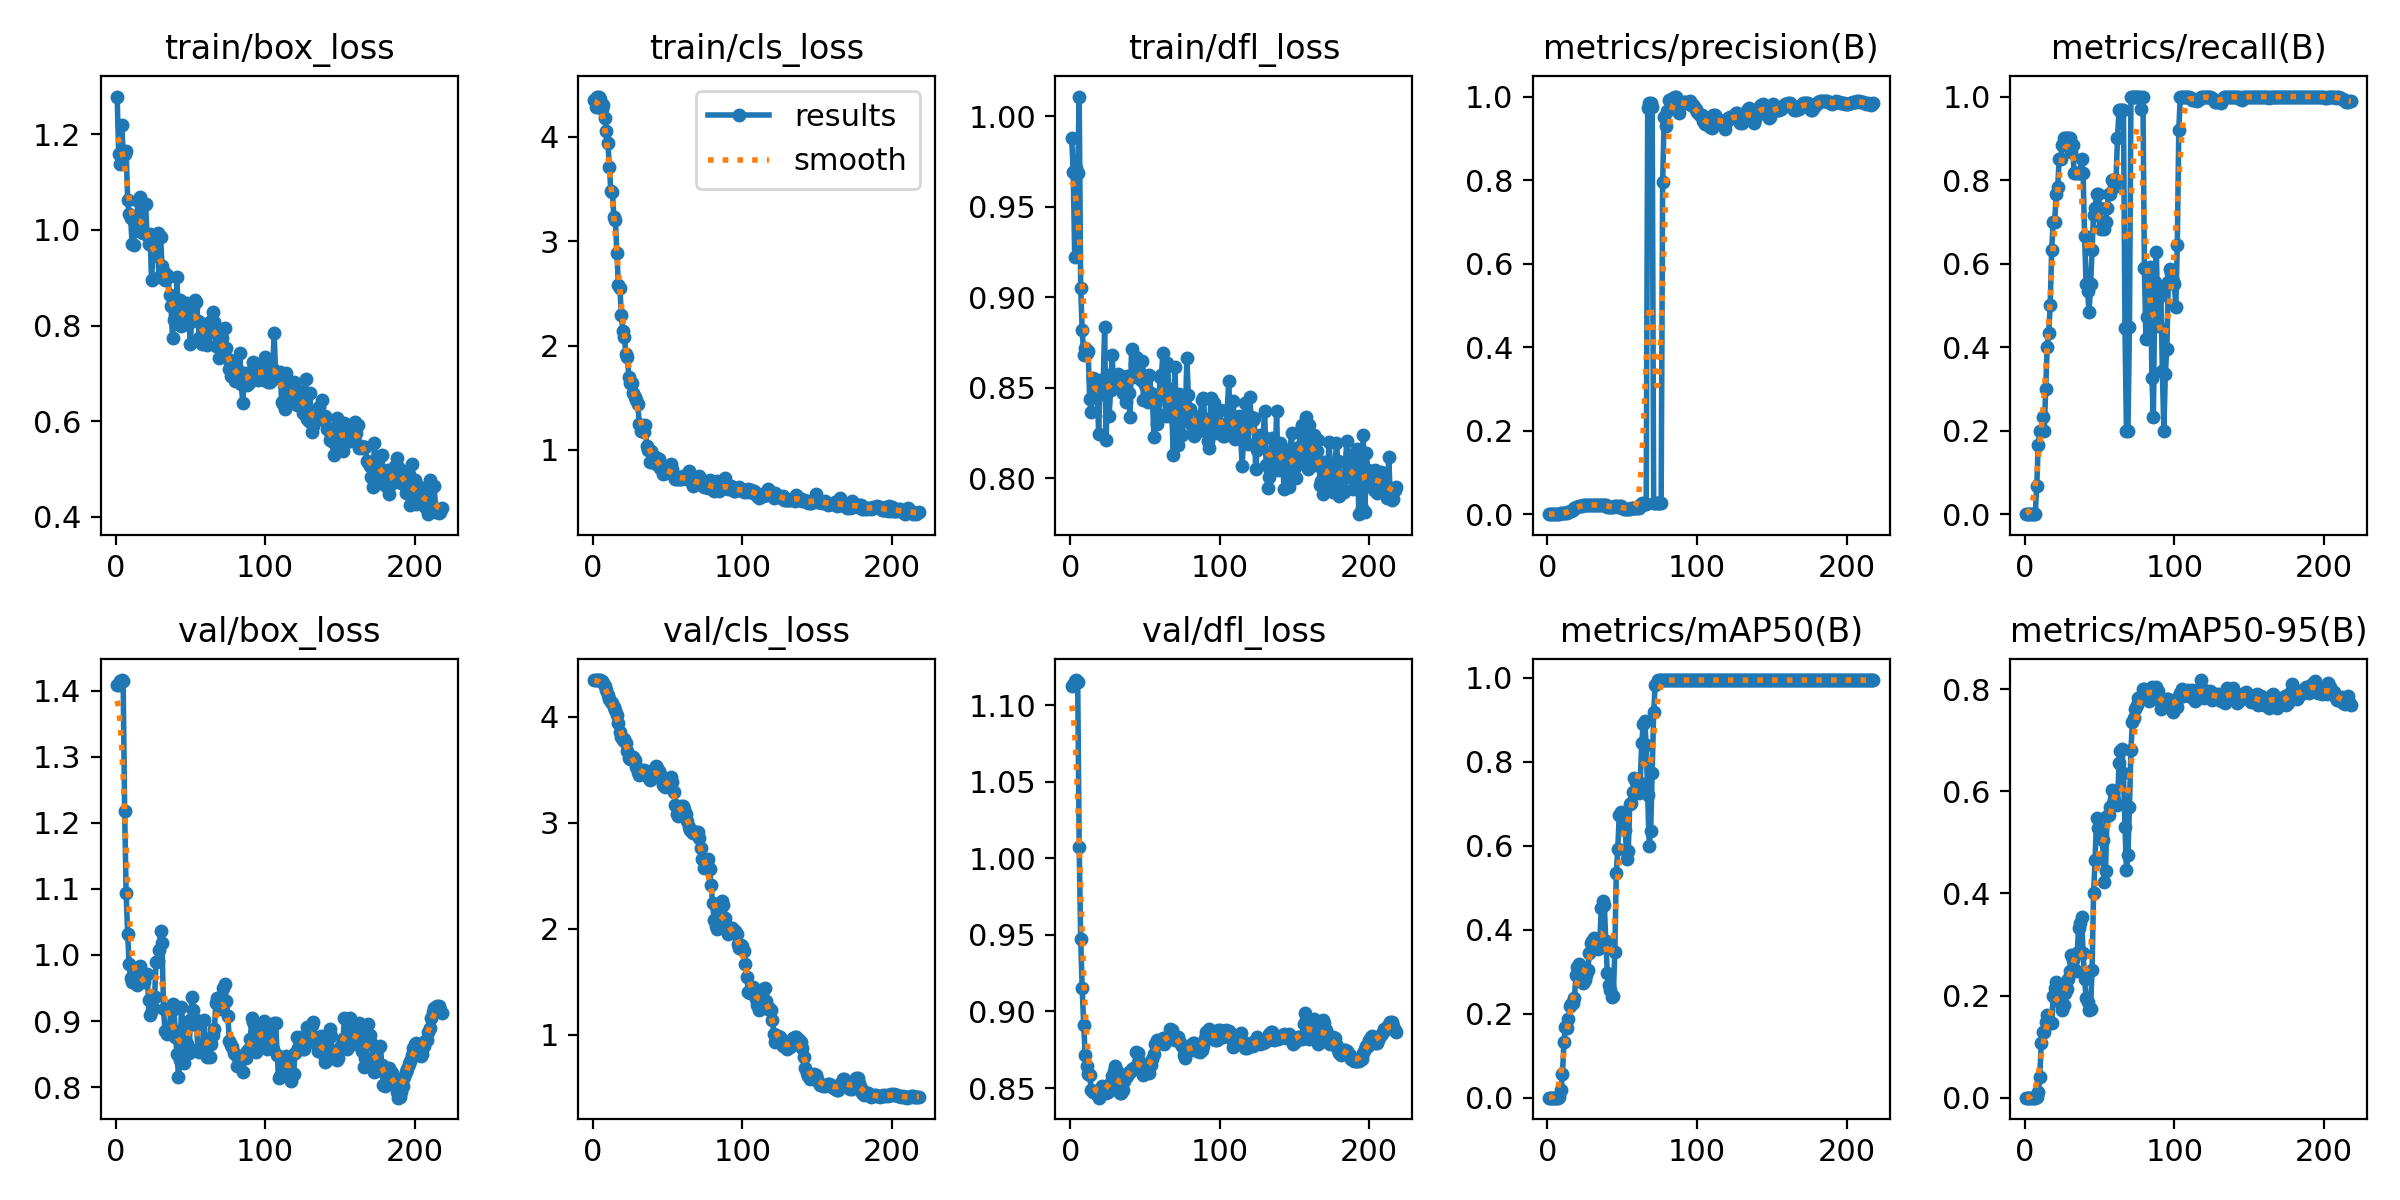

In [7]:
# Variable que contiene el directorio local
local = os.getcwd()

# Ruta de la imagen que se quiere mostrar desde el directorio actual
image_path = f'{local}/runs/detect/train/results.png'

# Mostrar la imagen
Image(filename=image_path, height=600)

# Exportación del modelo
Se descarga el modelo para peder usar los nuevos pesos de la red para predicción con la cámara Intel.

In [ ]:
model.export()

Ultralytics YOLOv8.2.9 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.30GHz)
Model summary (fused): 168 layers, 3006623 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from 'runs/detect/train2/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 9, 8400) (6.0 MB)

TorchScript: starting export with torch 2.2.1+cu121...
TorchScript: export success ✅ 2.1s, saved as 'runs/detect/train2/weights/best.torchscript' (11.9 MB)

Export complete (4.0s)
Results saved to /content/runs/detect/train2/weights
Predict:         yolo predict task=detect model=runs/detect/train2/weights/best.torchscript imgsz=640  
Validate:        yolo val task=detect model=runs/detect/train2/weights/best.torchscript imgsz=640 data=/content/Imágenes_Etiquetadas/dataset.yaml  
Visualize:       https://netron.app


'runs/detect/train2/weights/best.torchscript'